# Introduction
This exercise aims to predict total amount of product sold by every shop, so we first give a quick review of testing set and then present the training set. The training set gives daily purchases of each item and we might need to aggregate it to the monthly level.

In [4]:
import pandas as pd
test = pd.read_csv("C:/data/test.csv")
test.head(10)

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268
5,5,5,5039
6,6,5,5041
7,7,5,5046
8,8,5,5319
9,9,5,5003


In [6]:
sales = pd.read_csv("C:/data/sales_train_v2.csv")
sales.head(15)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
5,10.01.2013,0,25,2564,349.00,1.0
6,02.01.2013,0,25,2565,549.00,1.0
7,04.01.2013,0,25,2572,239.00,1.0
8,11.01.2013,0,25,2572,299.00,1.0
9,03.01.2013,0,25,2573,299.00,3.0


There are total 60 shops, however, the number of items sold by each shop can differ significantly. Furthermore, the quantities sold for each item can also change drastically.

In [3]:
pd.Series(sales.shop_id.values).unique()

array([59, 25, 24, 23, 19, 22, 18, 21, 28, 27, 29, 26,  4,  6,  2,  3,  7,
        0,  1, 16, 15,  8, 10, 14, 13, 12, 53, 31, 30, 32, 35, 56, 54, 47,
       50, 42, 43, 52, 51, 41, 38, 44, 37, 46, 45,  5, 57, 58, 55, 17,  9,
       49, 39, 40, 48, 34, 33, 20, 11, 36], dtype=int64)

Total items sold by shop 1 are 2523.

In [11]:
len(list(pd.Series(sales.loc[sales.shop_id==1].item_id.values).unique()))

2523

Total items sold by shop 11 are 371.

In [12]:
len(list(pd.Series(sales.loc[sales.shop_id==11].item_id.values).unique()))
# 11, 20, 36

371

Total items sold by shop 20 are 746.

In [13]:
len(list(pd.Series(sales.loc[sales.shop_id==20].item_id.values).unique()))
# 11, 20, 36

746

Total items sold by shop 37 are 8405.

In [15]:
len(list(pd.Series(sales.loc[sales.shop_id==37].item_id.values).unique()))
# 11, 20, 36

8405

Below we compare the first 39 items in shop 1, shop 20, and shop 37. 

In shop 1, most purchases occured once and the purchase amount ranged from 1 unit to 6 units.

Shop 20 has the same purchase pattern as shop 1, but the purchase amount usually exceeds 5 units for every item.

Shop 37 has some desired patterns, i.e. some items were consumed consecutively over the months and we have more data for statistical or machine learning modeling.

# Distribution of Shop 1


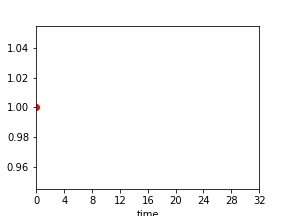
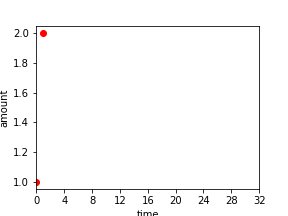
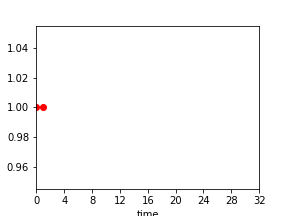
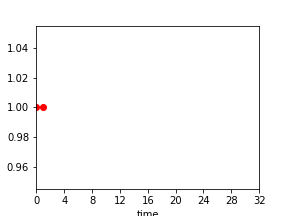
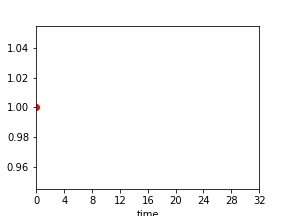
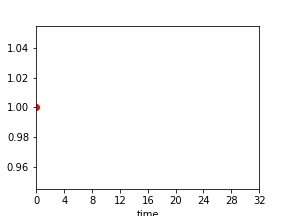
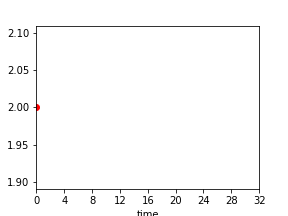
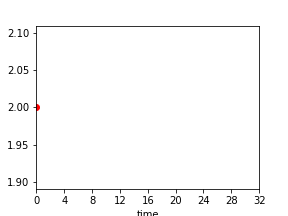
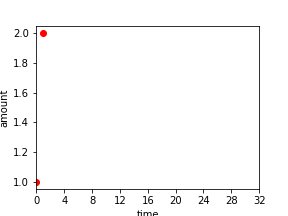
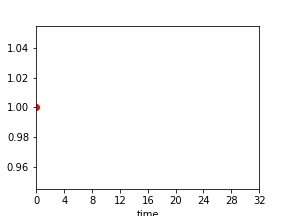
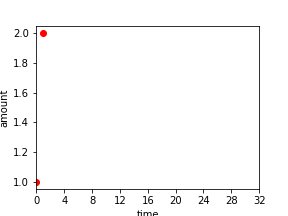
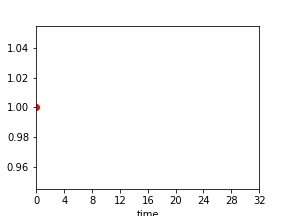
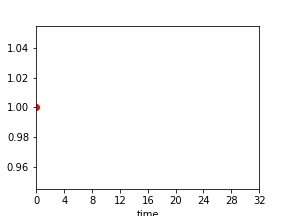
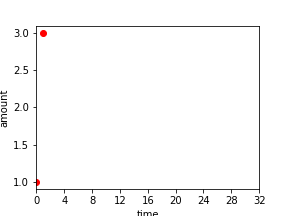
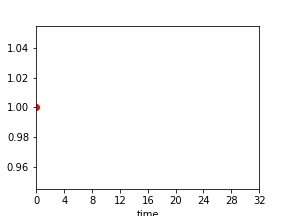
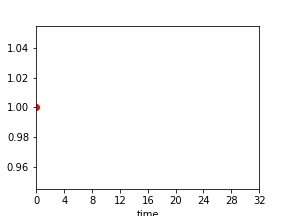
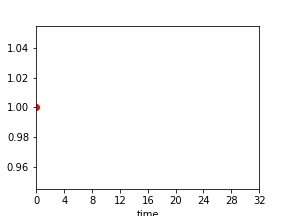
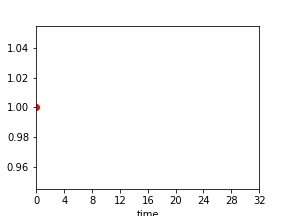
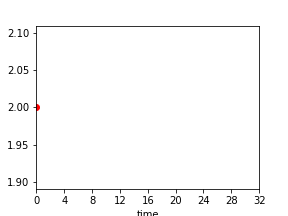
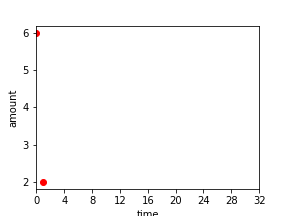
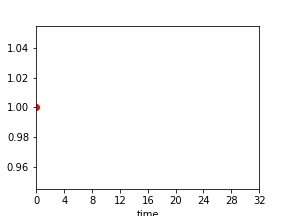
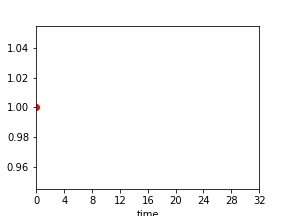
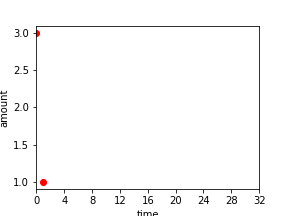
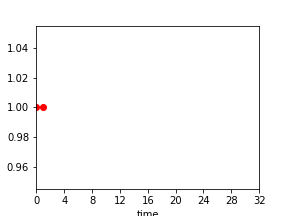
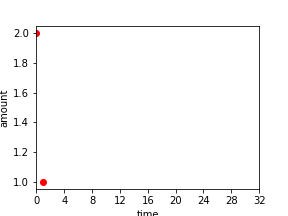
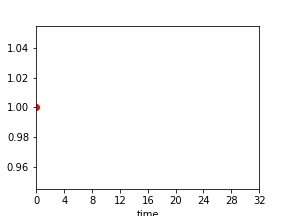
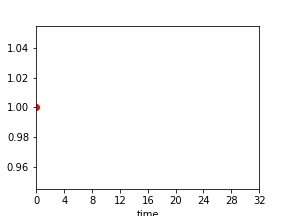
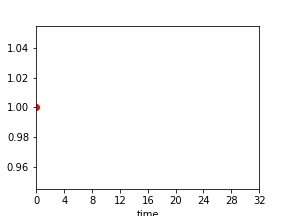
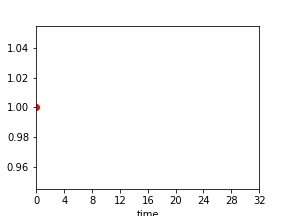
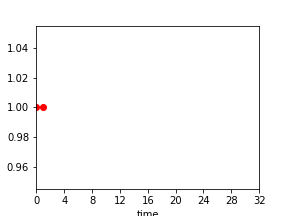
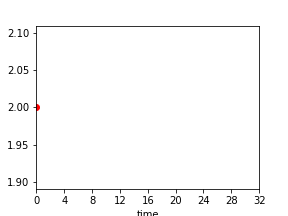
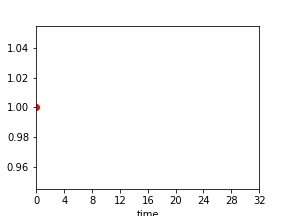
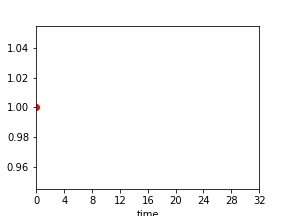
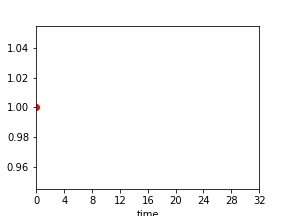
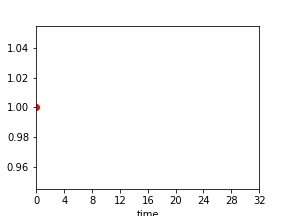
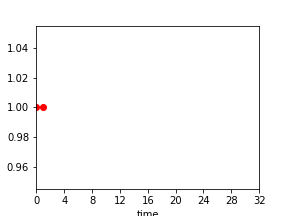
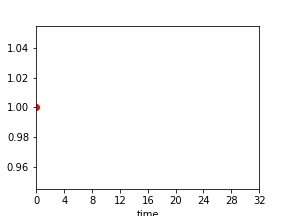
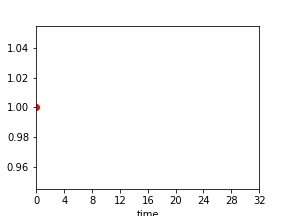
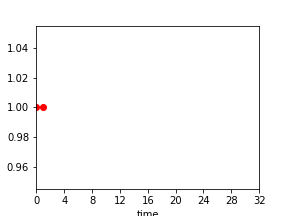

In [18]:
from plots import FlowLayout
import matplotlib.pyplot as plt
oPlot = FlowLayout.FlowLayout()

shop_list = [1]
counter = 0

for shop in shop_list:
    for item in list(pd.Series(sales.loc[sales.shop_id == shop].item_id.values).unique()):
        counter += 1
        data = sales.loc[(sales.shop_id == shop)&(sales.item_id == item)]
        data2 = data.groupby(['date_block_num'])['item_cnt_day', 'item_price'].sum()
        fig, ax = plt.subplots(1, 1, figsize=(4,3))
        ax.plot(data2['item_cnt_day'], 'ro')
        plt.xticks(range(0,34,4))
        plt.xlabel('time')
        plt.ylabel('amount')
        oPlot.add_plot(ax)
        plt.close()
        if counter == 39: break
oPlot.PassHtmlToCell()

# Distribution of Shop 20


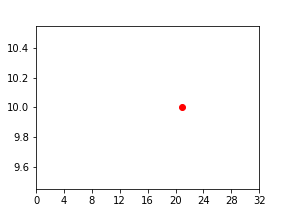
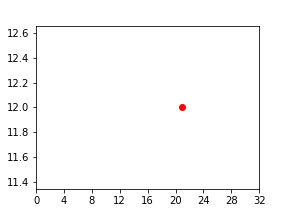
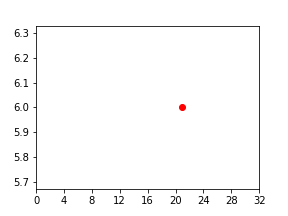
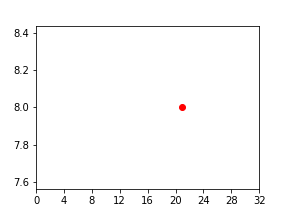
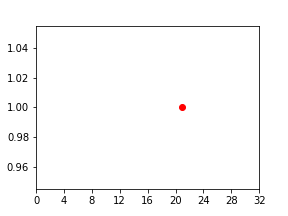
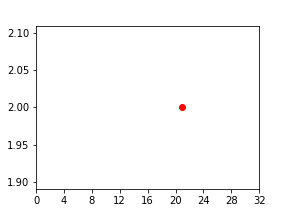
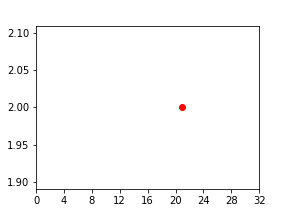
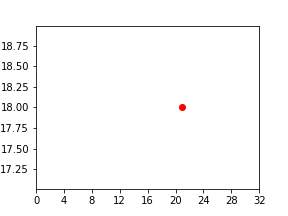
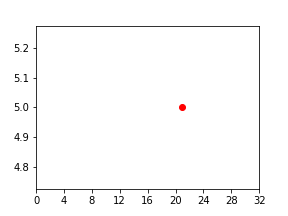
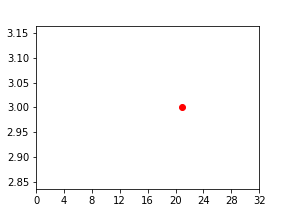
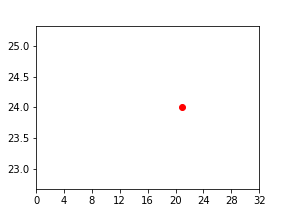
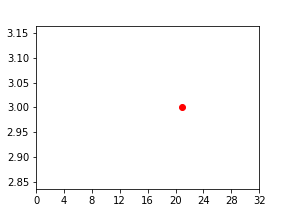
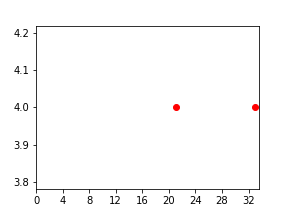
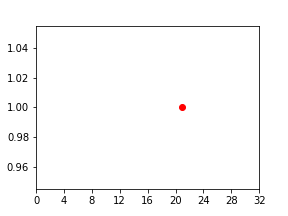
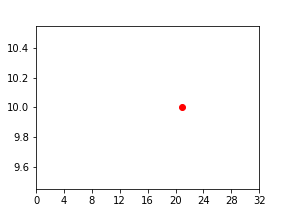
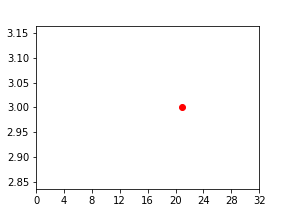
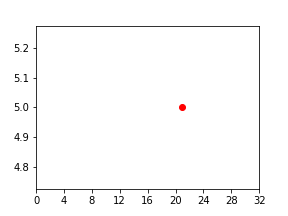
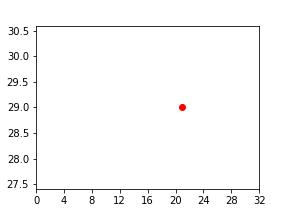
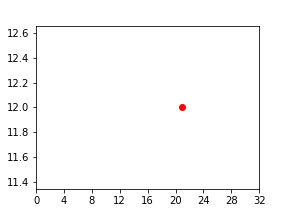
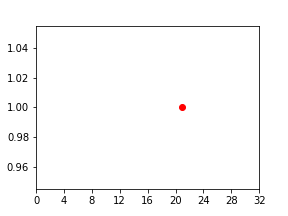
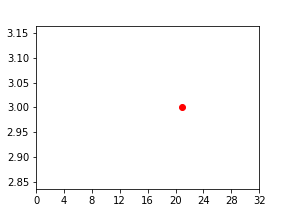
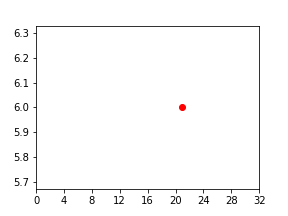
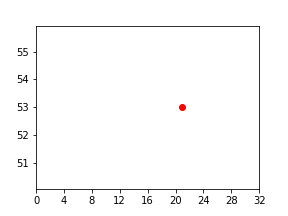
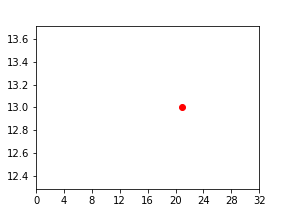
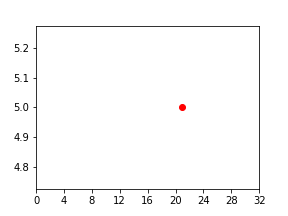
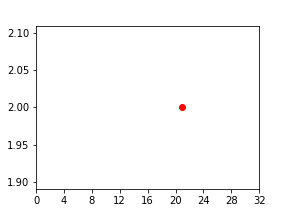
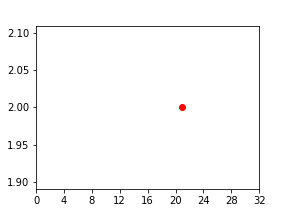
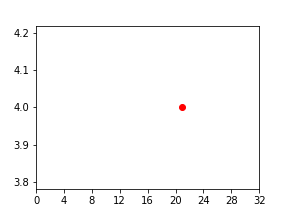
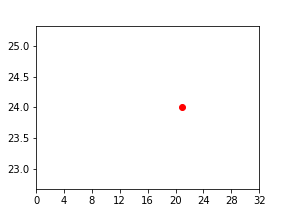
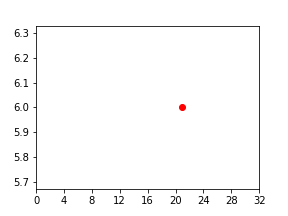
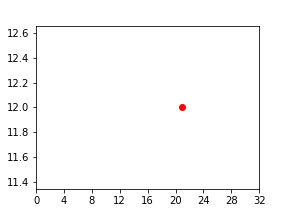
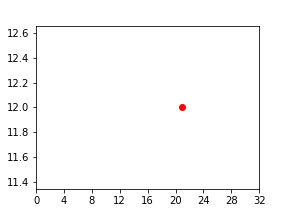
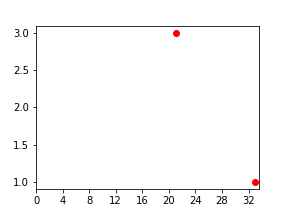
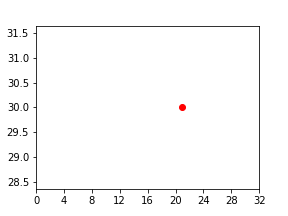
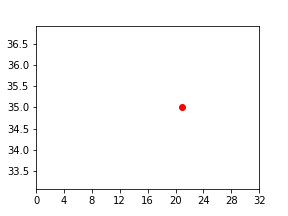
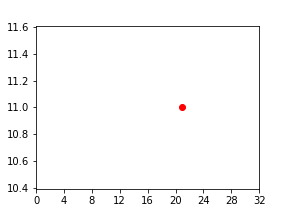
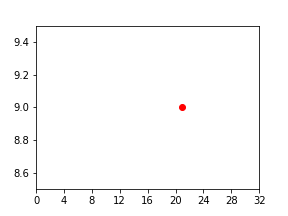
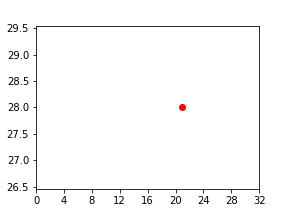
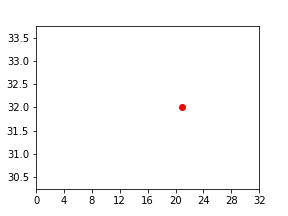

In [3]:
from plots import FlowLayout
import matplotlib.pyplot as plt
oPlot = FlowLayout.FlowLayout()

shop_list = [20]
counter = 0

for shop in shop_list:
    for item in list(pd.Series(sales.loc[sales.shop_id == shop].item_id.values).unique()):
        counter += 1
        data = sales.loc[(sales.shop_id == shop)&(sales.item_id == item)]
        data2 = data.groupby(['date_block_num'])['item_cnt_day', 'item_price'].sum()
        fig, ax = plt.subplots(1, 1, figsize=(4,3))
        ax.plot(data2['item_cnt_day'], 'ro')
        plt.xticks(range(0,34,4))
        plt.xlabel('time')
        plt.ylabel('amount')
        oPlot.add_plot(ax)   
        plt.close()
        if counter == 39: break       
oPlot.PassHtmlToCell()

# Distribution of Shop 37


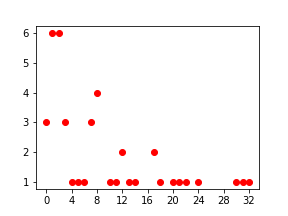
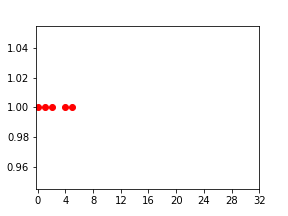
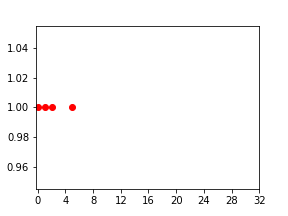
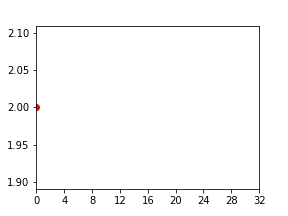
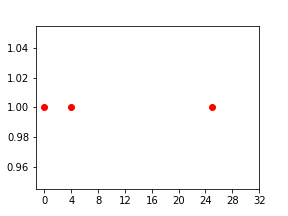
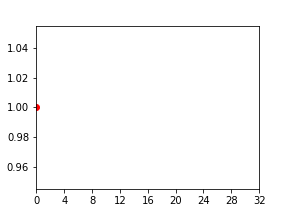
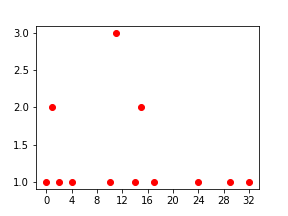
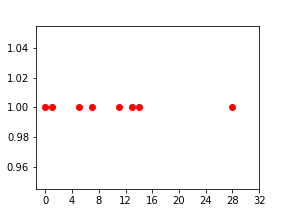
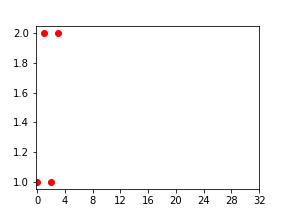
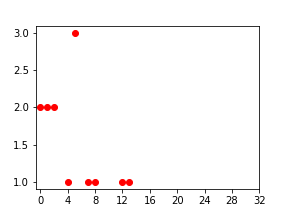
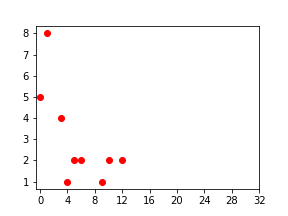
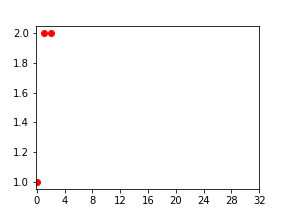
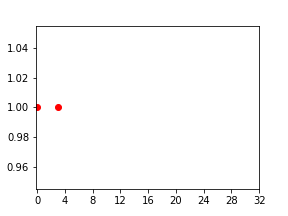
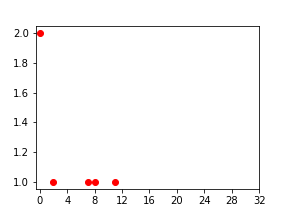
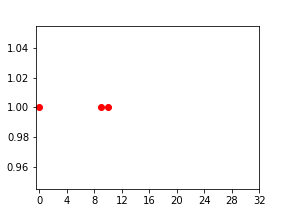
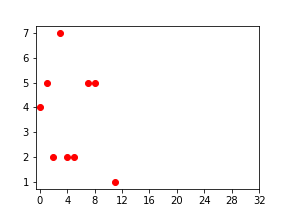
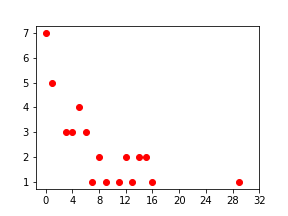
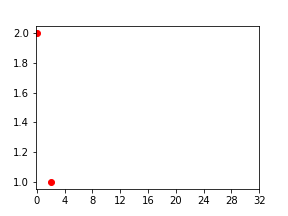
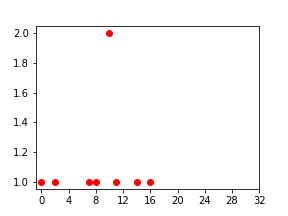
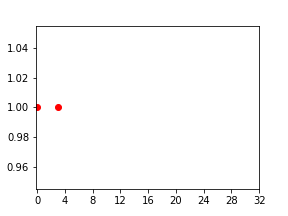
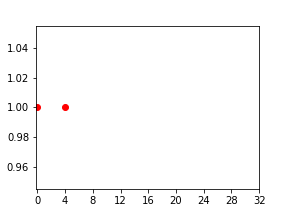
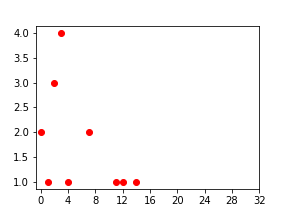
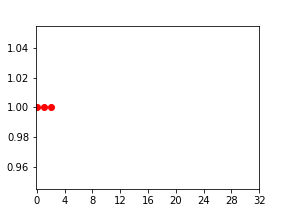
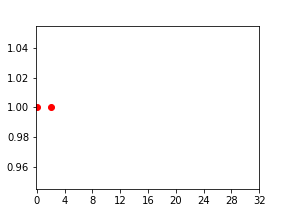
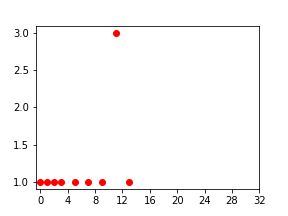
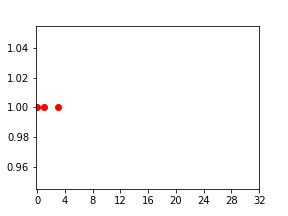
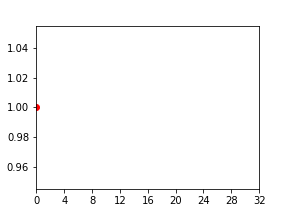
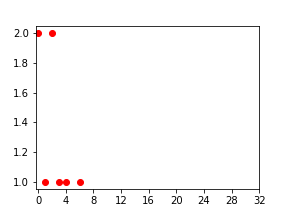
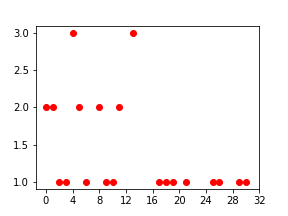
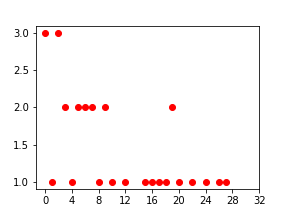
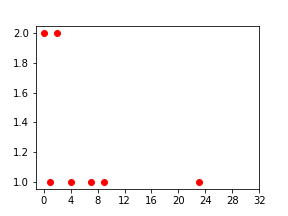
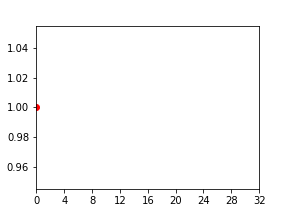
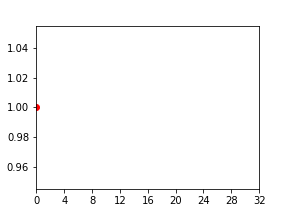
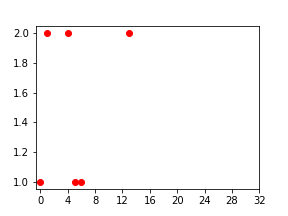
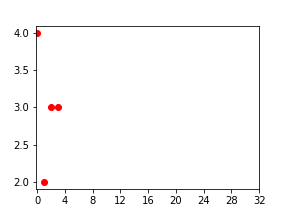
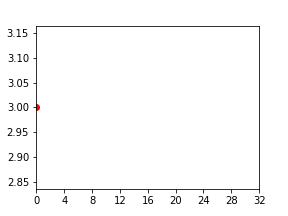
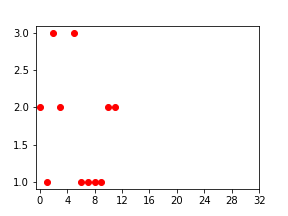
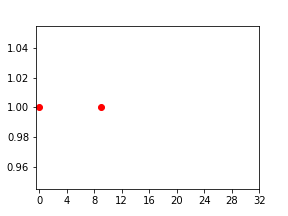
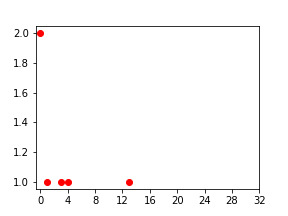

In [12]:
from plots import FlowLayout
import matplotlib.pyplot as plt
oPlot = FlowLayout.FlowLayout()

shop_list = [37]
counter = 0

for shop in shop_list:
    for item in list(pd.Series(sales.loc[sales.shop_id == shop].item_id.values).unique()):
        counter += 1
        data = sales.loc[(sales.shop_id == shop)&(sales.item_id == item)]
        data2 = data.groupby(['date_block_num'])['item_cnt_day', 'item_price'].sum()
        fig, ax = plt.subplots(1, 1, figsize=(4,3))
        ax.plot(data2['item_cnt_day'], 'ro')
        plt.xticks(range(0,34,4))
        plt.xlabel('time')
        plt.ylabel('amount')
        oPlot.add_plot(ax)   
        plt.close()
        if counter == 39: break 
oPlot.PassHtmlToCell()

In the next step, we start with shop 37 and item 4885 (the first figure in Distribution of Shop 37) and try to model it with recurrent neural network with long short-term memory (RNN LSTM).